<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting monthly milk production Using RNN/LSTM
## Written by Abiola Obembe
## Date : 2020-10-23

In [33]:
# Import libarries
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 : Data Preprocessing

In [34]:
# Import training set 
dataset_train = pd.read_csv('monthly-milk-production-pounds.csv')
dataset_train.head(20)




,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [35]:
# Check dataframe shape
dataset_train.shape

(169, 2)

In [36]:
# Check data structures
dataset_train.dtypes

Month                                                        object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    float64
dtype: object

In [37]:
# check for missing values
missing_values = dataset_train.isnull().sum().sum()
print("The number of missing values in the dataframe is", missing_values)

The number of missing values in the dataframe is 1


In [38]:
# Drop missing values
dataset_train = dataset_train.dropna(axis = 0)

# check for missing values in new dataframe
missing_values = dataset_train.isnull().sum().sum()
print("The number of missing values in the new dataframe is", missing_values)


The number of missing values in the new dataframe is 0


In [39]:
# Print column headers
dataset_train.columns

Index(['Month', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [40]:
# Change column headers to something more meaningful
dataset_train.columns = ['Time', 'Production']
dataset_train.head()

,Time,Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


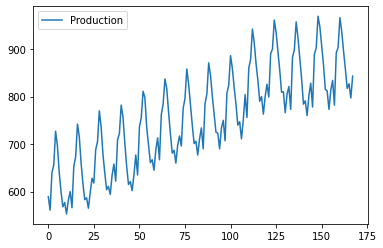

In [41]:
# Plot dataset

dataset_train.plot()
plt.show()

In [42]:
# Convert time column values to date time format
dataset_train['Time'] = pd.to_datetime(dataset_train['Time'])
dataset_train.head()

,Time,Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [43]:
# Obtain training set for analysis
train_set = dataset_train.iloc[:,1:2].values
train_set[0:5]

array([[589.],
       [561.],
       [640.],
       [656.],
       [727.]])

In [44]:
# Feature scaling by normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [45]:
# print train set
train_set_sc[0:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [46]:
# Create data structure using history (Tx) and 1 output for training set
Tx = 10
X_train = []
y_train = []
m = len(train_set_sc)

for i in range(Tx, m):
    X_train.append(train_set_sc[i-Tx : i, 0])
    y_train.append(train_set_sc[i,0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)

In [47]:
# Examine data structure for training set
print(X_train.shape)
print(y_train.shape)
X_train

(158, 10)
(158,)


array([[0.08653846, 0.01923077, 0.20913462, ..., 0.11057692, 0.03605769,
        0.05769231],
       [0.01923077, 0.20913462, 0.24759615, ..., 0.03605769, 0.05769231,
        0.        ],
       [0.20913462, 0.24759615, 0.41826923, ..., 0.05769231, 0.        ,
        0.06971154],
       ...,
       [0.625     , 0.67548077, 0.55048077, ..., 0.82451923, 0.73317308,
        0.63461538],
       [0.67548077, 0.55048077, 0.81490385, ..., 0.73317308, 0.63461538,
        0.65865385],
       [0.55048077, 0.81490385, 0.84134615, ..., 0.63461538, 0.65865385,
        0.58653846]])

In [48]:
# Reshape to RNN Input shape including adding new indicators

X_train = np.reshape(X_train, newshape= (X_train.shape[0], X_train.shape[1], 1))


## Part 2 - Building the RNN / LSTM / GRU

In [49]:
# Import the libraries from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM, GRU
from keras.layers import BatchNormalization

In [50]:
# Initalize the GRU

gru = Sequential()

In [51]:
# Add the first layer and dropout regularization
gru.add(GRU(units = 50, return_sequences= True, input_shape= (X_train.shape[1],1))) # the 1 in input-shape corresponds to no of indicators
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [52]:
# Add the Second layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=True))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [53]:
# Add the Third layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=True))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [54]:
# Add the Fourth layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=False))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [55]:
# Add the output layer
gru.add(Dense(units = 1))

In [56]:
# Compile the GRU
gru.compile(optimizer = 'adam', loss = 'mean_squared_error')
gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10, 50)            7950      
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 50)            200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 10, 50)            15300     
_________________________________________________________________
batch_normalization_5 (Batch (None, 10, 50)            200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 10, 50)           

In [57]:
# Fitting the gru to the training set
gru.fit(X_train, y_train, epochs = 200, batch_size=16)

Epoch 1/200
10/10 [==============================] - 0s 18ms/step - loss: 1.9336
Epoch 2/200
10/10 [==============================] - 0s 18ms/step - loss: 1.3209
Epoch 3/200
10/10 [==============================] - 0s 20ms/step - loss: 1.2805
Epoch 4/200
10/10 [==============================] - 0s 20ms/step - loss: 0.7760
Epoch 5/200
10/10 [==============================] - 0s 18ms/step - loss: 0.7789
Epoch 6/200
10/10 [==============================] - 0s 18ms/step - loss: 0.5030
Epoch 7/200
10/10 [==============================] - 0s 19ms/step - loss: 0.5757
Epoch 8/200
10/10 [==============================] - 0s 19ms/step - loss: 0.7127
Epoch 9/200
10/10 [==============================] - 0s 19ms/step - loss: 0.5427
Epoch 10/200
10/10 [==============================] - 0s 19ms/step - loss: 0.5924
Epoch 11/200
10/10 [==============================] - 0s 20ms/step - loss: 0.4081
Epoch 12/200
10/10 [==============================] - 0s 18ms/step - loss: 0.5440
Epoch 13/200
10/10 [=====

## Step 3: Making Predictions and visualizing the results

In [58]:
# Save the model
gru.save('MilkProduction_Model1_200Epochs.h5')

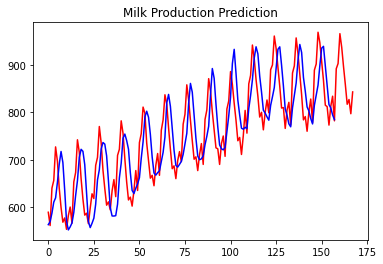

In [59]:
predicted_y = gru.predict(X_train)
predicted_y = sc.inverse_transform(predicted_y)

#%%
# Visualising the result
plt.plot(train_set, color = 'red', label = 'Real Milk Production')
plt.plot(predicted_y, color = 'blue', label = 'Predicted Milk Production')
plt.title("Milk Production Prediction")
plt.show()